# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)


# The tech stocks we'll use for this analysis
tech_list = ['NFLX', 'DIS', 'AAPL', 'GOOG', 'MSFT', 'META']
data = yf.download(tech_list, start=start, end=end)['Adj Close']

# Check if data is a DataFrame and calculate correlation
if isinstance(data, pd.DataFrame):
    correlation_matrix = data.corr()
    print(correlation_matrix)
else:
    print("Data is not a DataFrame.")

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [NFLX, DIS, AAPL, GOOG, MSFT, META]
company_name = ["NETFLIX", "DISNEY", "APPLE", "GOOGLE", "MICROSOFT", "META"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  6 of 6 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Ticker      AAPL       DIS      GOOG      META      MSFT      NFLX
Ticker                                                            
AAPL    1.000000 -0.127119  0.818557  0.773499  0.846485  0.733556
DIS    -0.127119  1.000000  0.130224  0.194095  0.144698  0.166243
GOOG    0.818557  0.130224  1.000000  0.923883  0.937754  0.864722
META    0.773499  0.194095  0.923883  1.000000  0.979571  0.950148
MSFT    0.846485  0.144698  0.937754  0.979571  1.000000  0.942692
NFLX    0.733556  0.166243  0.864722  0.950148  0.942692  1.000000



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-18  504.559998  506.000000  495.019989  499.489990  499.489990   
2024-06-20  502.000000  503.670013  496.769989  501.700012  501.700012   
2024-06-21  503.450012  503.450012  492.390015  494.779999  494.779999   
2024-06-24  499.200012  507.799988  494.290009  498.910004  498.910004   
2024-06-25  497.049988  510.709991  495.500000  510.600006  510.600006   
2024-06-26  506.649994  513.809998  504.679993  513.119995  513.119995   
2024-06-27  514.250000  522.880005  513.900024  519.559998  519.559998   
2024-06-28  517.150024  521.880005  503.839996  504.220001  504.220001   
2024-07-01  504.950012  506.579987  493.170013  504.679993  504.679993   
2024-07-02  500.760010  510.500000  499.450012  509.500000  509.500000   

              Volume company_name  
Date                               
2024-06-18  13060400         META  
2024-06-20  11801200         META  
2024-06-21  23130700         META  
2024-06-24  13525300         META  
2024-06-25  12109800         META  
2024-06-26   8882300         META  
2024-06-27  10121200         META  
2024-06-28  15855100         META  
2024-07-01  10328200         META  
2024-07-02   7729100         META

Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.



## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [2]:
# Summary Stats
NFLX.describe()

Open        High         Low       Close   Adj Close  \
count  502.000000  502.000000  502.000000  502.000000  502.000000   
mean   406.562570  412.610378  401.157013  407.095339  407.095339   
std    133.356307  133.869489  132.612005  133.380498  133.380498   
min    170.500000  177.520004  169.699997  174.449997  174.449997   
25%    306.365005  311.312508  301.807495  306.619995  306.619995   
50%    397.229996  402.085007  391.255005  395.715012  395.715012   
75%    484.172501  486.802498  476.434998  484.510002  484.510002   
max    685.000000  689.880005  678.140015  686.119995  686.119995   

             Volume  
count  5.020000e+02  
mean   6.902697e+06  
std    5.347065e+06  
min    1.404700e+06  
25%    3.687925e+06  
50%    5.532350e+06  
75%    7.998400e+06  
max    5.392030e+07

We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [3]:
# General info
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-07-05 to 2024-07-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          502 non-null    float64
 1   High          502 non-null    float64
 2   Low           502 non-null    float64
 3   Close         502 non-null    float64
 4   Adj Close     502 non-null    float64
 5   Volume        502 non-null    int64  
 6   company_name  502 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

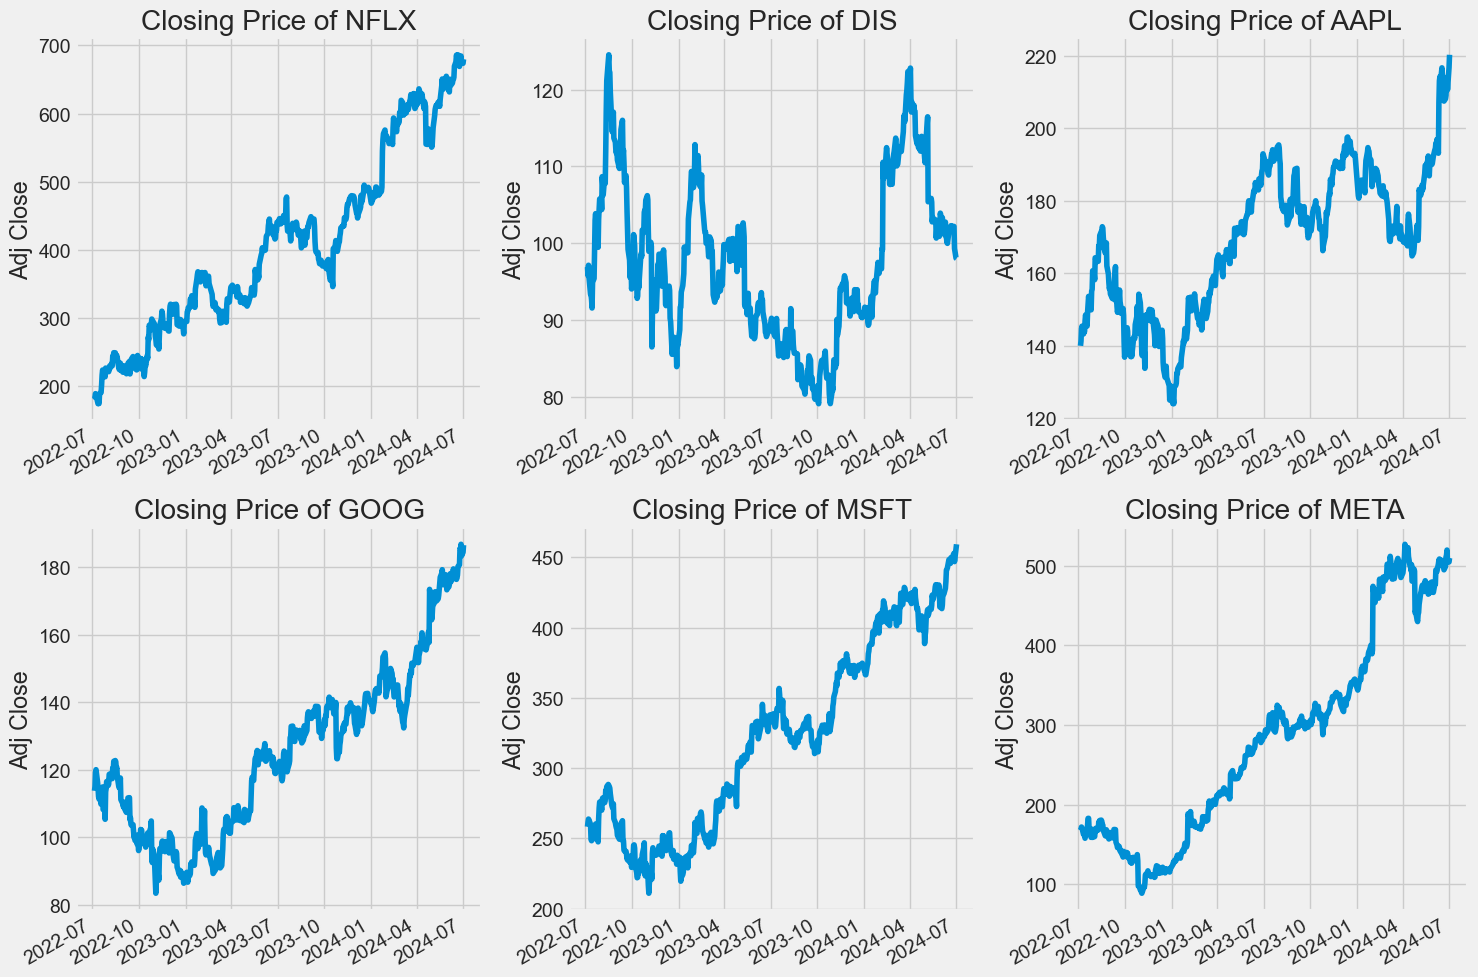

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

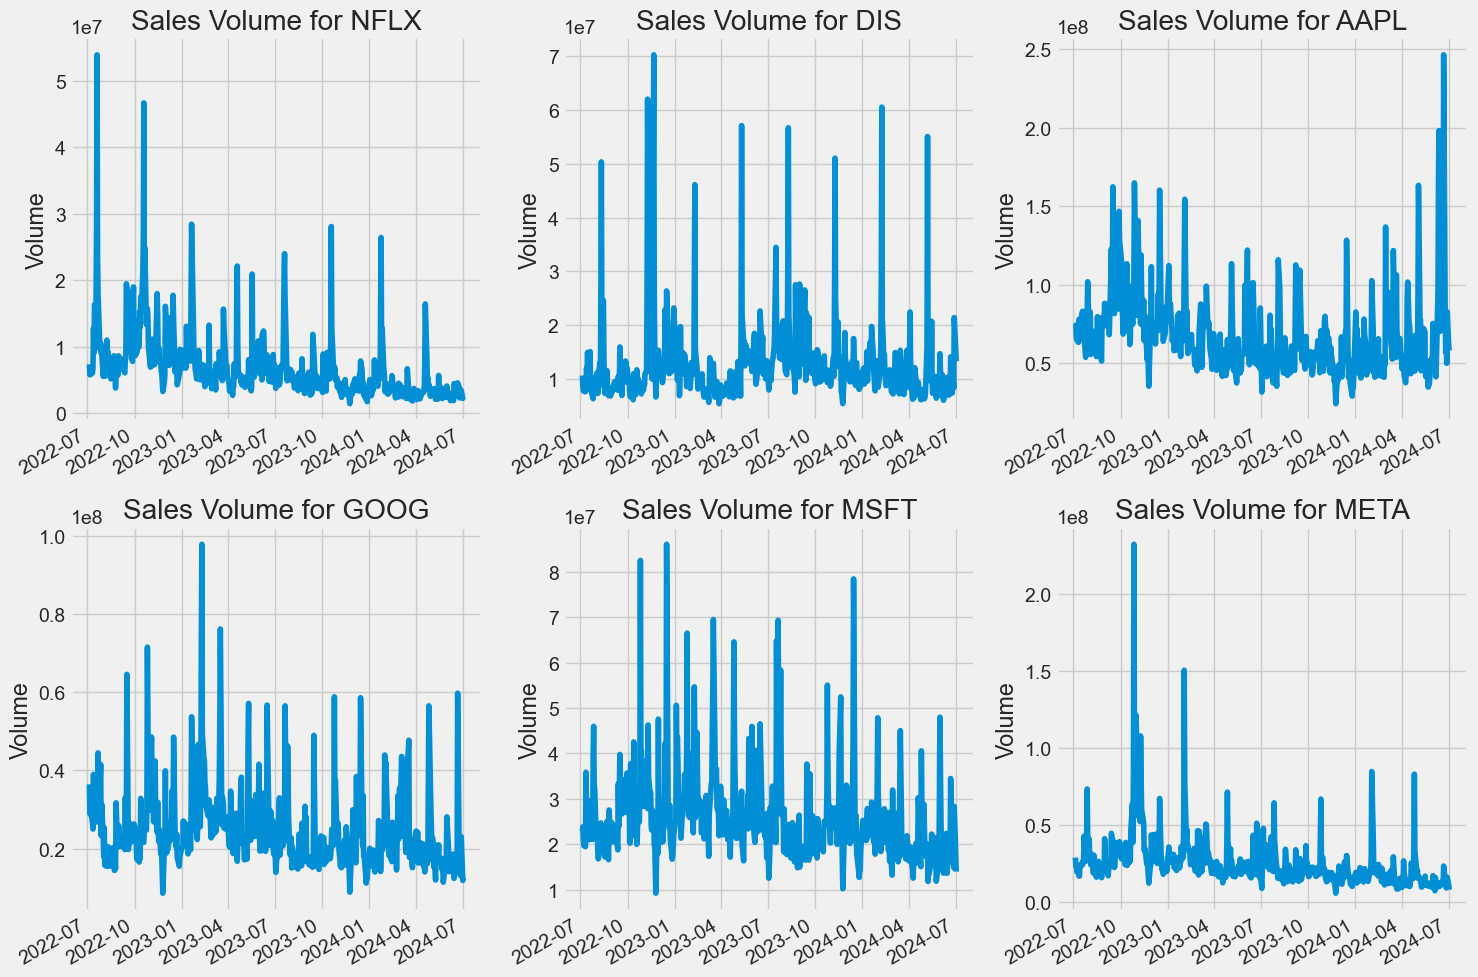

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

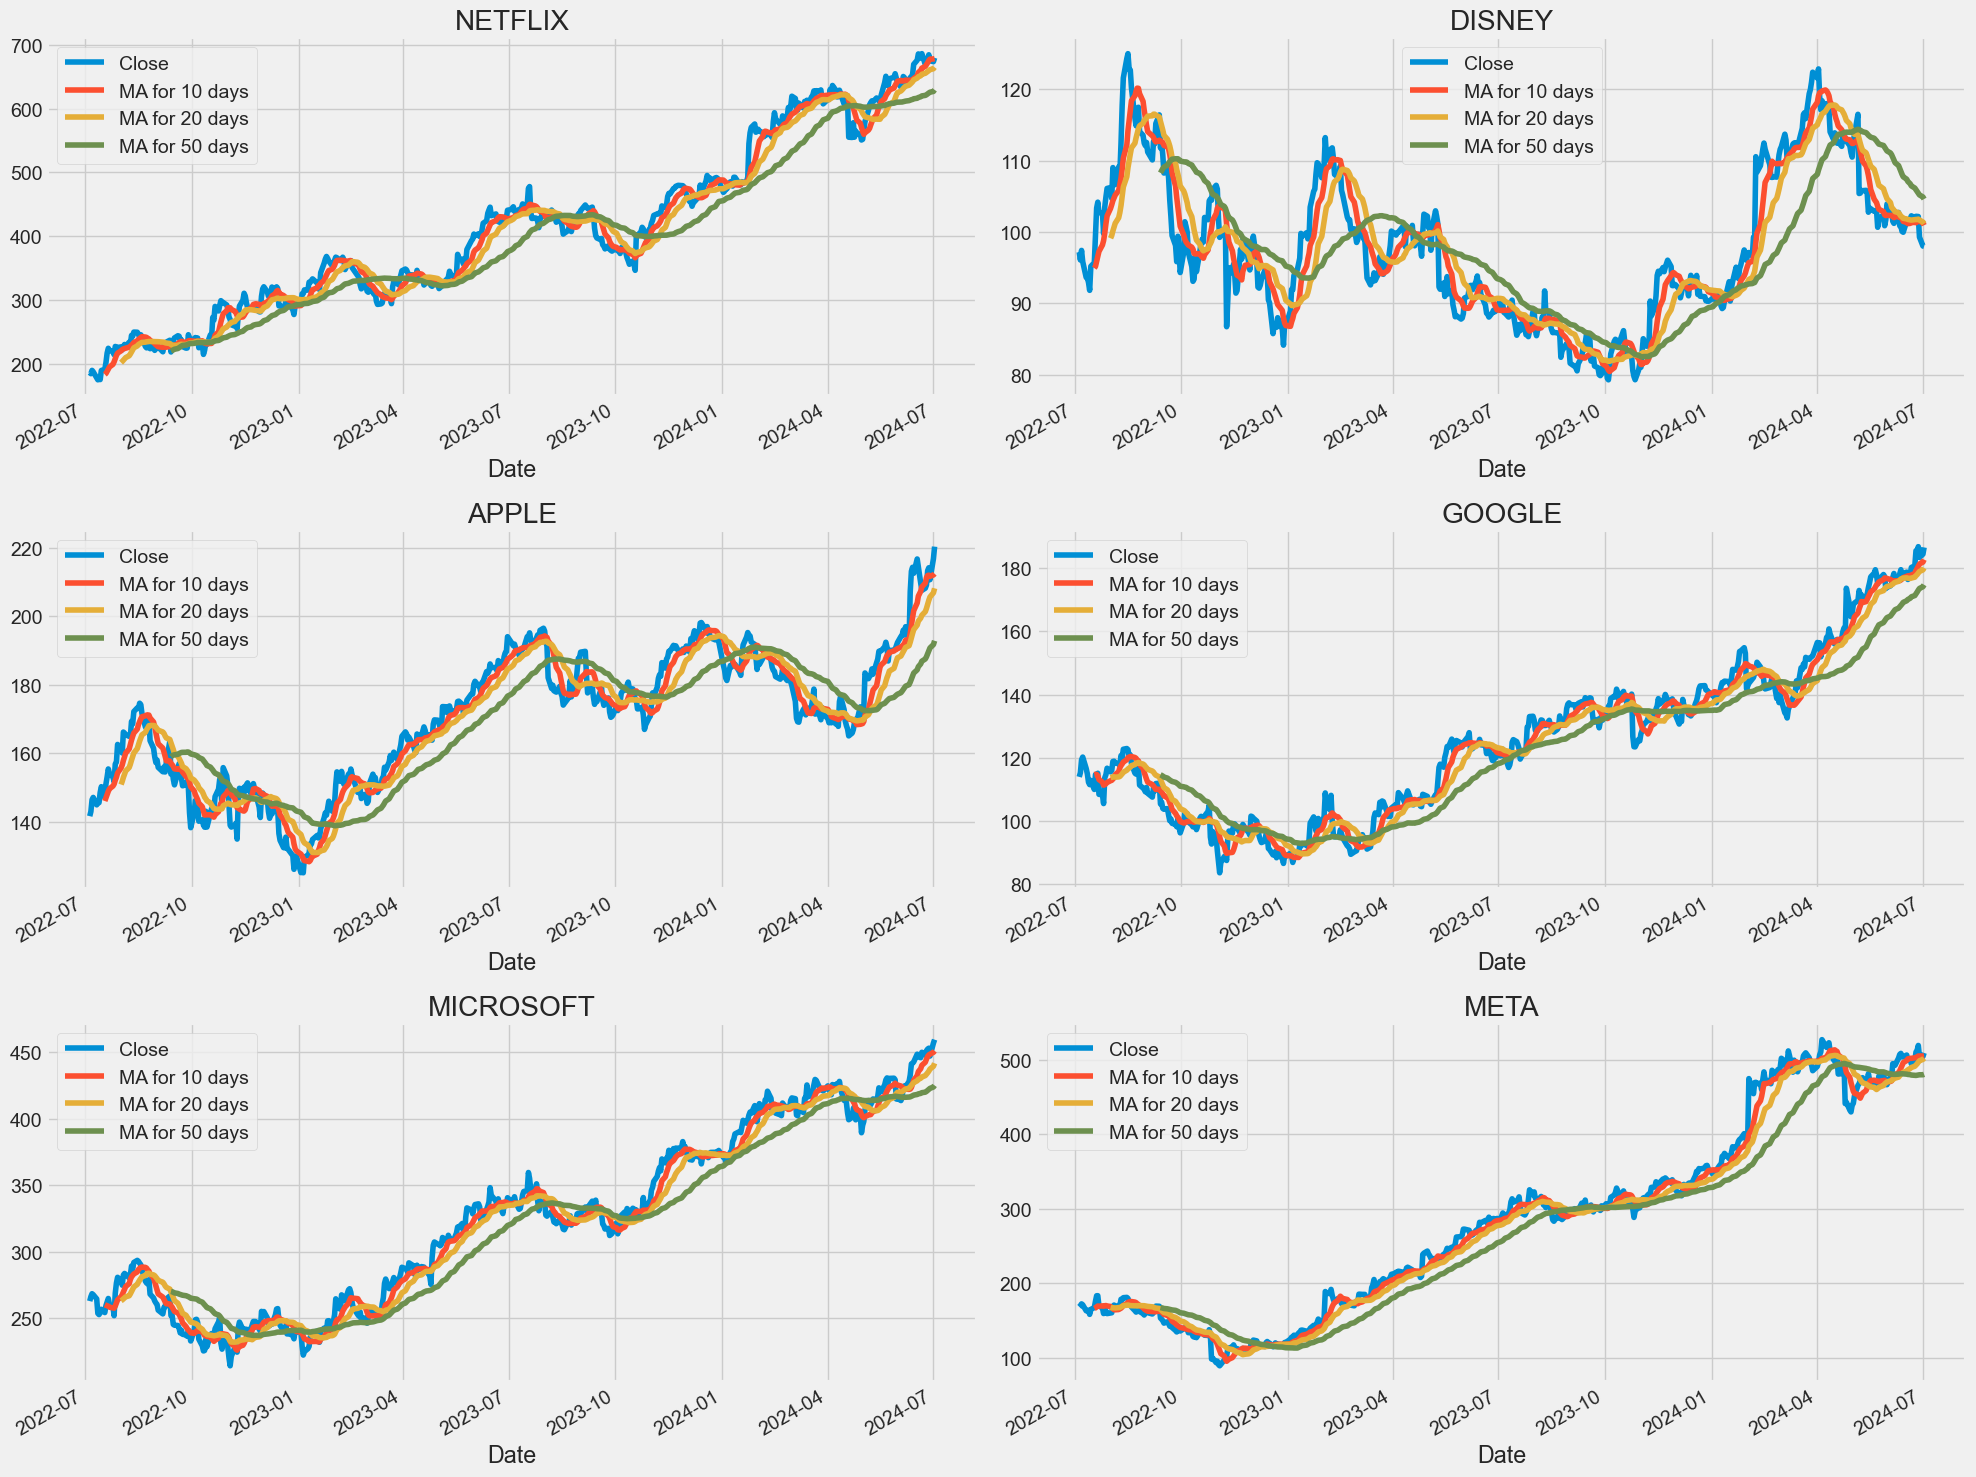

In [6]:
ma_day = [10, 20, 50]

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

for idx, (company, com_name) in enumerate(zip(company_list, company_name)):
    row = idx // 2
    col = idx % 2
    company[['Close']].plot(ax=axes[row, col], legend=True)  # Plot 'Close' line with legend
    
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()  # Assuming 'Close' is the column name for closing prices
        company[[column_name]].plot(ax=axes[row, col], legend=True)  # Plot moving average line with legend
    axes[row, col].set_title(com_name)

fig.tight_layout()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

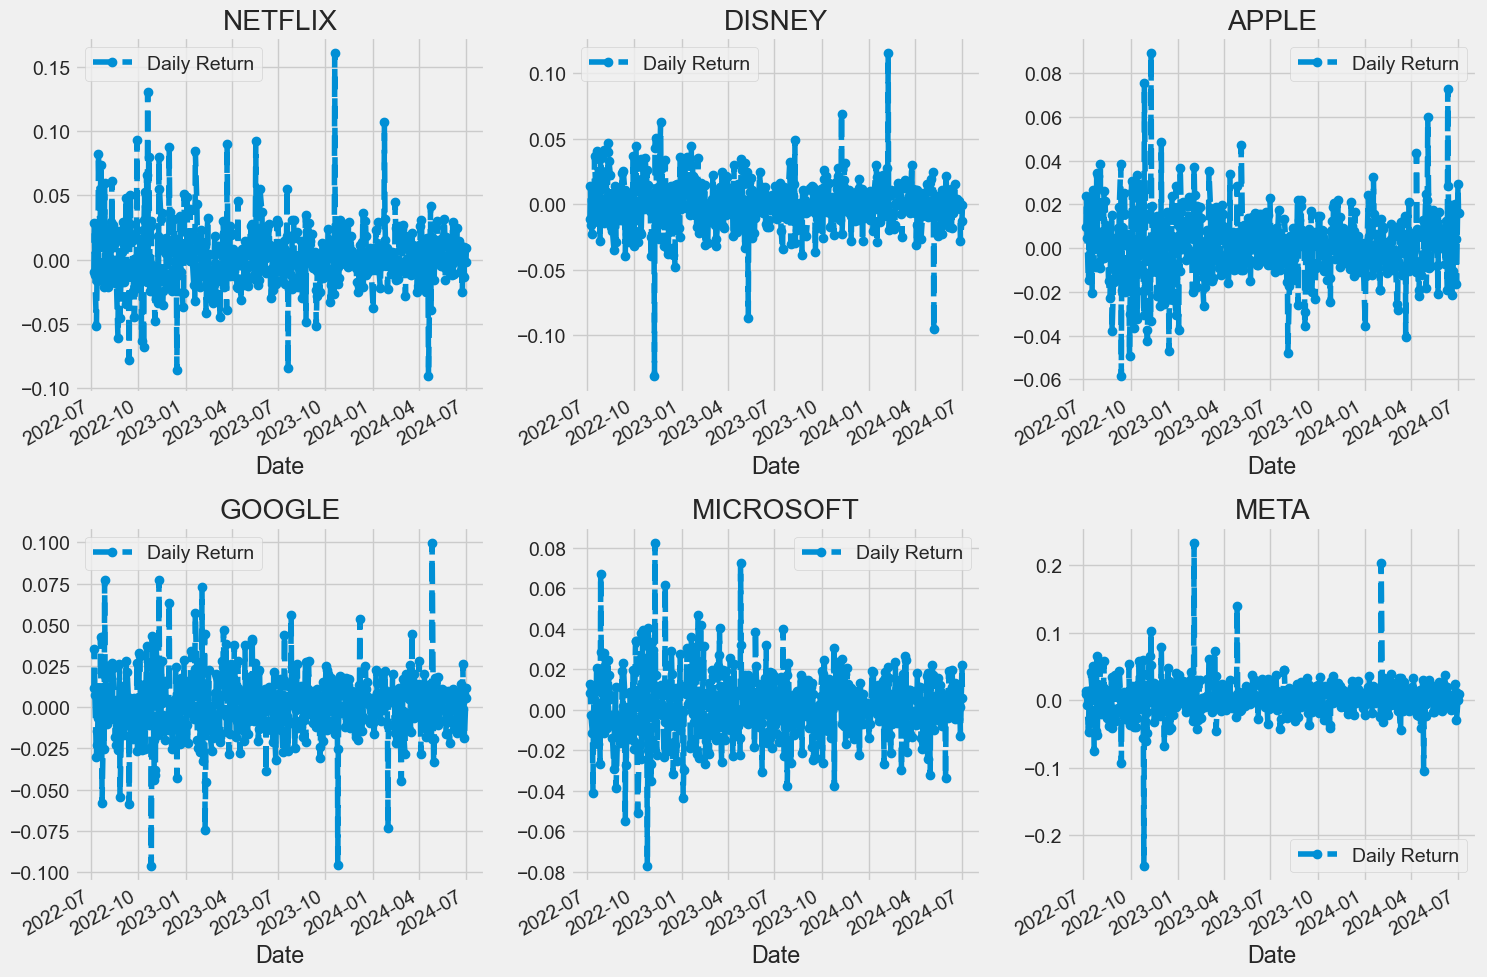

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()  # Assuming 'Close' is the column name for closing prices

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=3)  # Adjust the number of rows and columns based on the number of companies
fig.set_figheight(10)
fig.set_figwidth(15)

for idx, (company, com_name) in enumerate(zip(company_list, company_name)):
    row = idx // 3
    col = idx % 3
    company['Daily Return'].plot(ax=axes[row, col], legend=True, linestyle='--', marker='o')
    axes[row, col].set_title(com_name)

fig.tight_layout()


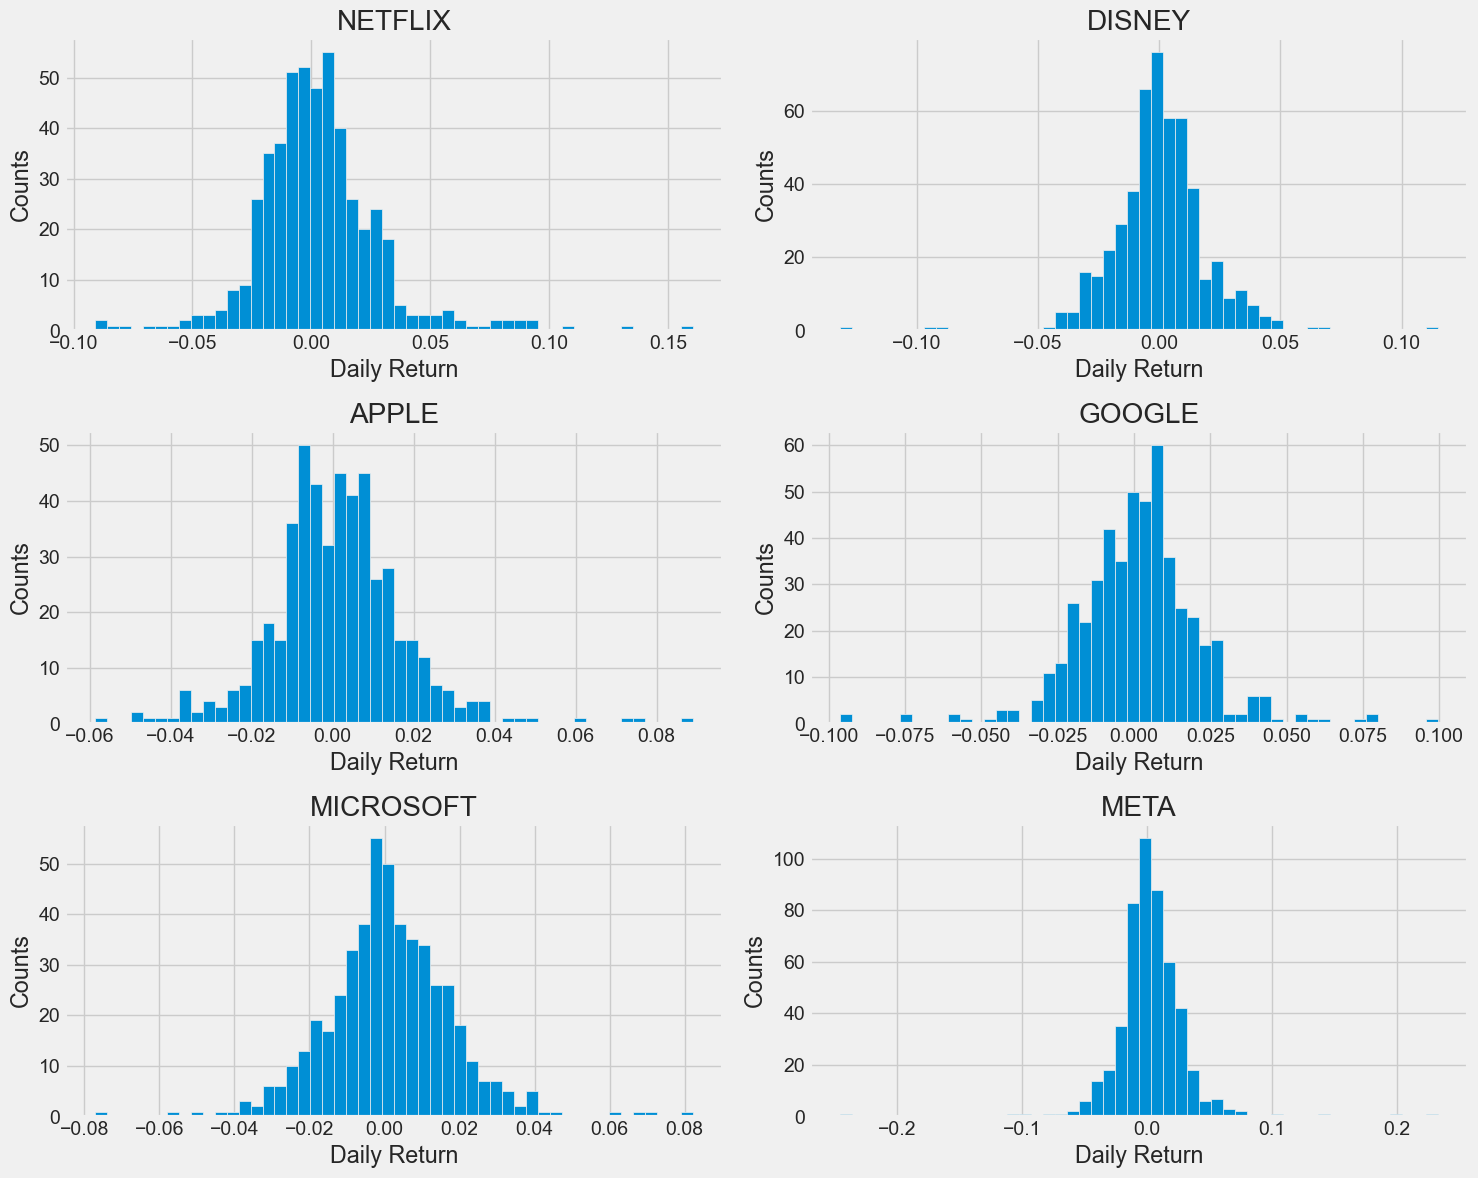

In [8]:
plt.figure(figsize=(15, 12))  # Adjusted figure size

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  6 of 6 completed


Ticker          AAPL       DIS      GOOG      META      MSFT      NFLX
Date                                                                  
2022-07-05       NaN       NaN       NaN       NaN       NaN       NaN
2022-07-06  0.009607 -0.011319  0.011647  0.009394  0.012783 -0.009791
2022-07-07  0.023999  0.014051  0.035521  0.014255  0.008227  0.028306
2022-07-08  0.004714 -0.016114  0.007229 -0.007608 -0.002757 -0.012099
2022-07-11 -0.014758 -0.023159 -0.030341 -0.046816 -0.011769 -0.051556

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

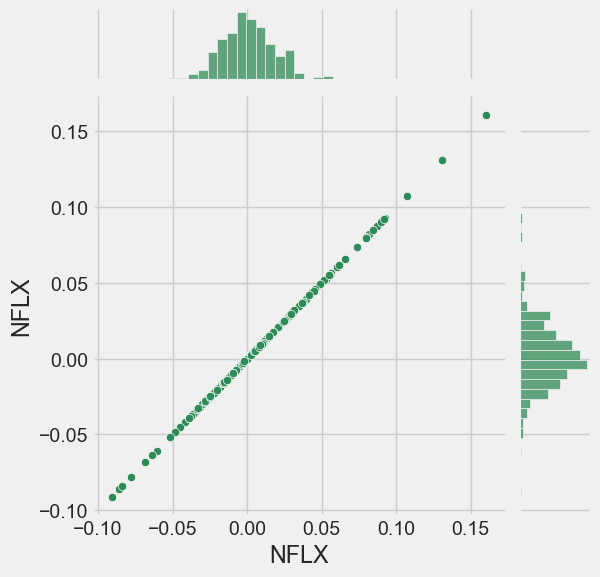

In [10]:
# Comparing Netflix to itself should show a perfectly linear relationship
sns.jointplot(x='NFLX', y='NFLX', data=tech_rets, kind='scatter', color='seagreen')

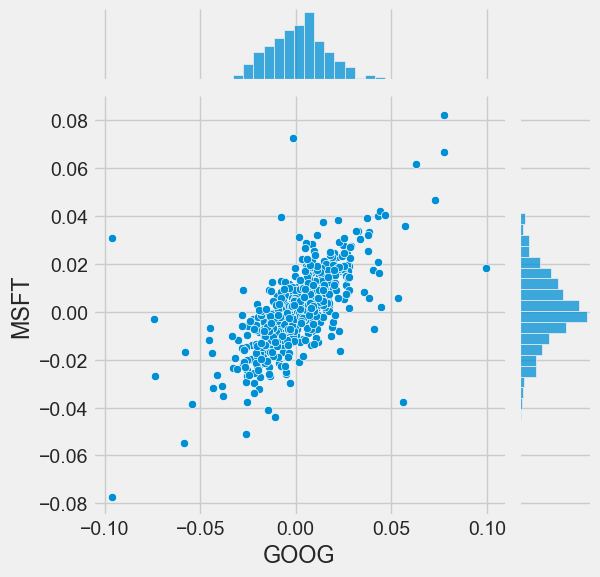

In [11]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

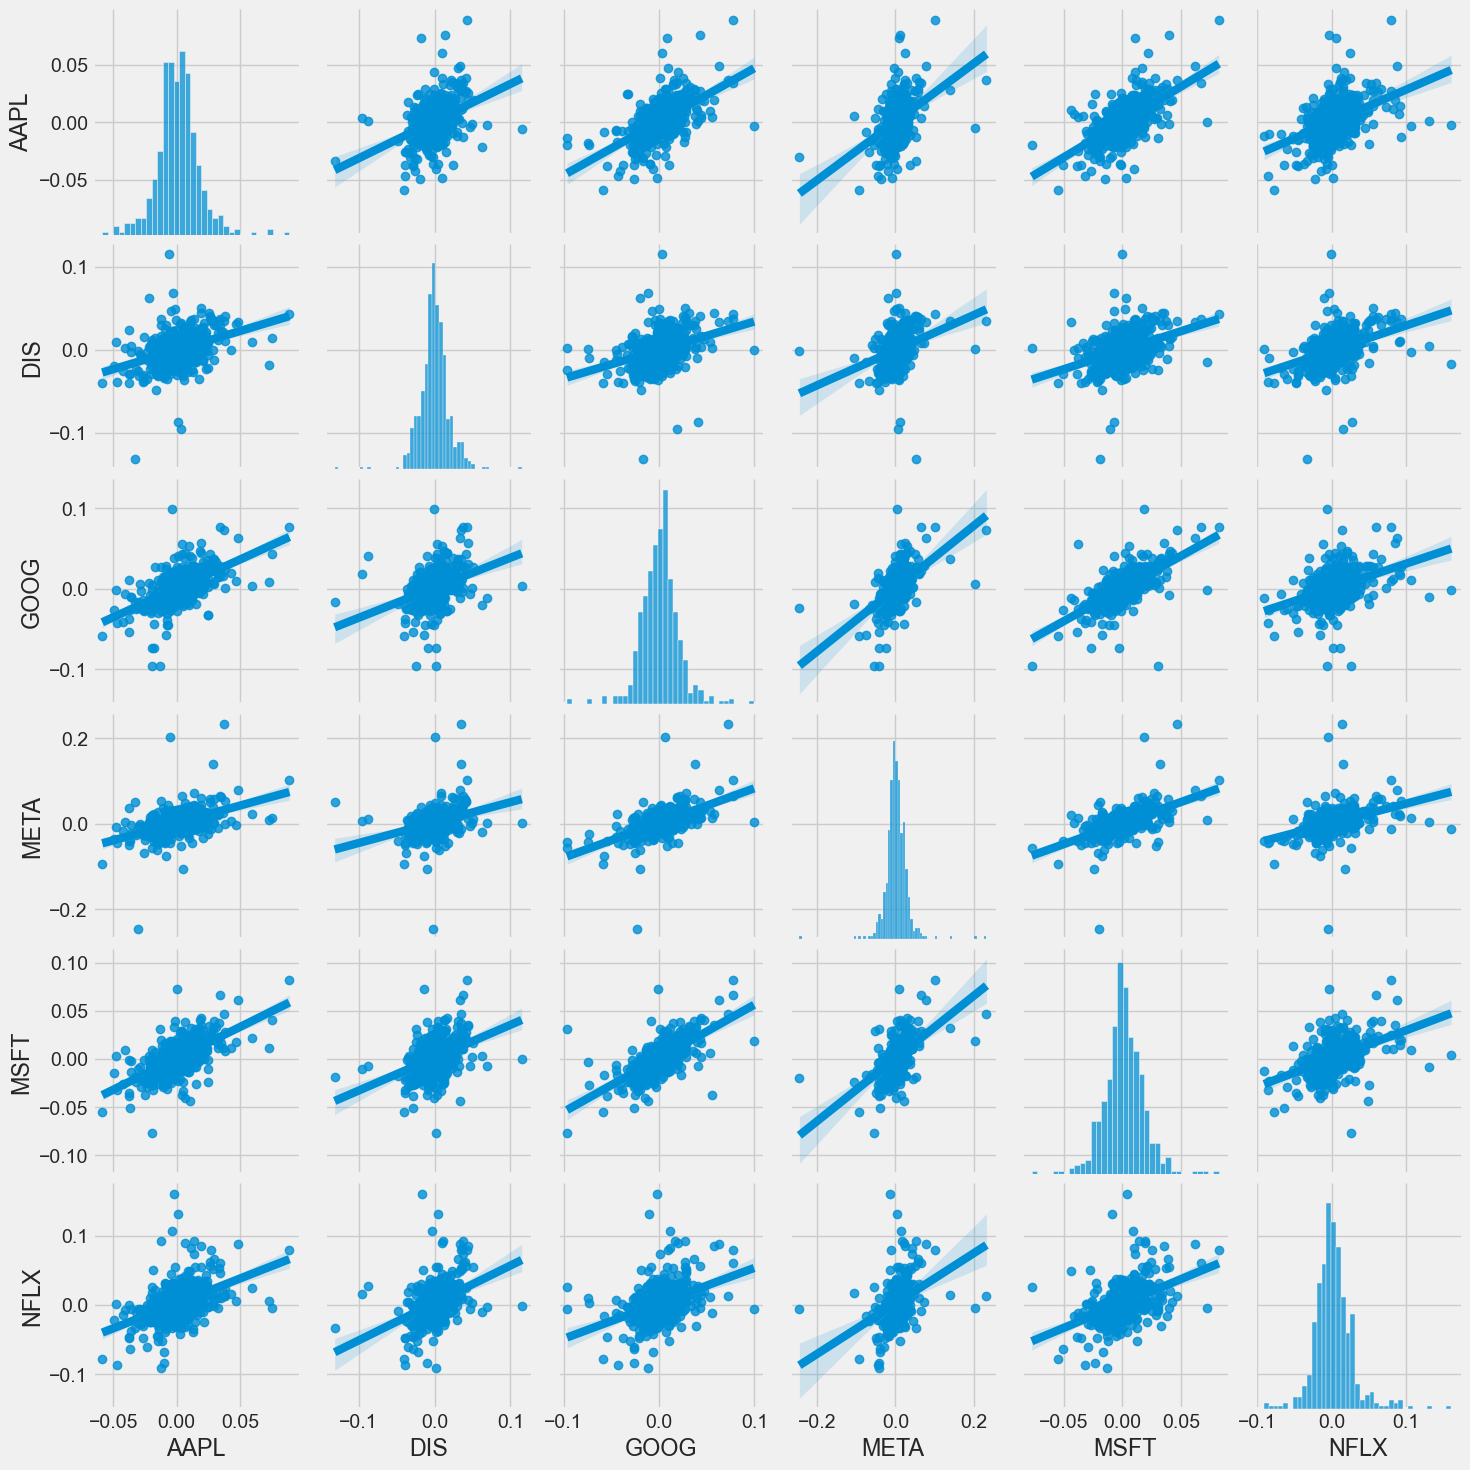

In [12]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Netflix and Meta, but also Netflix and Disney daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

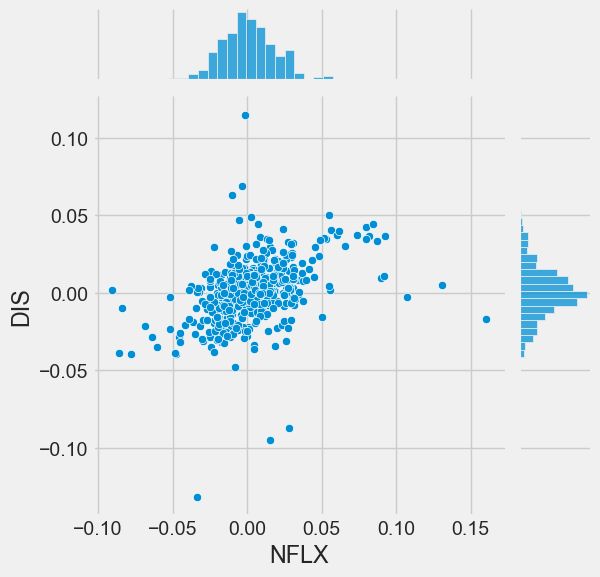

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='NFLX', y='DIS', data=tech_rets, kind='scatter')

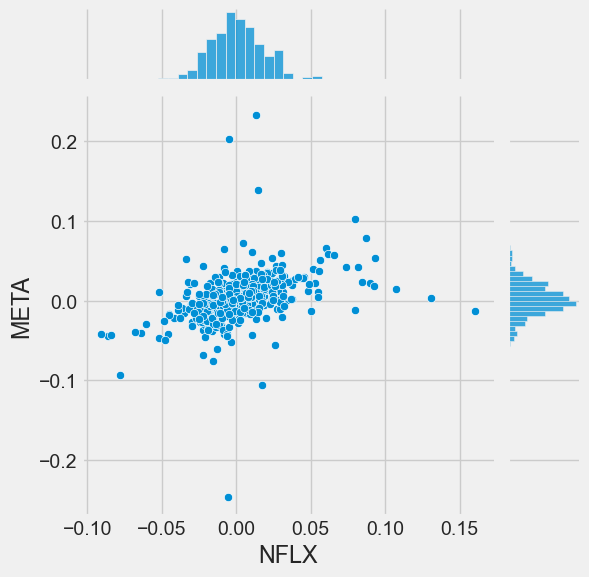

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='NFLX', y='META', data=tech_rets, kind='scatter')

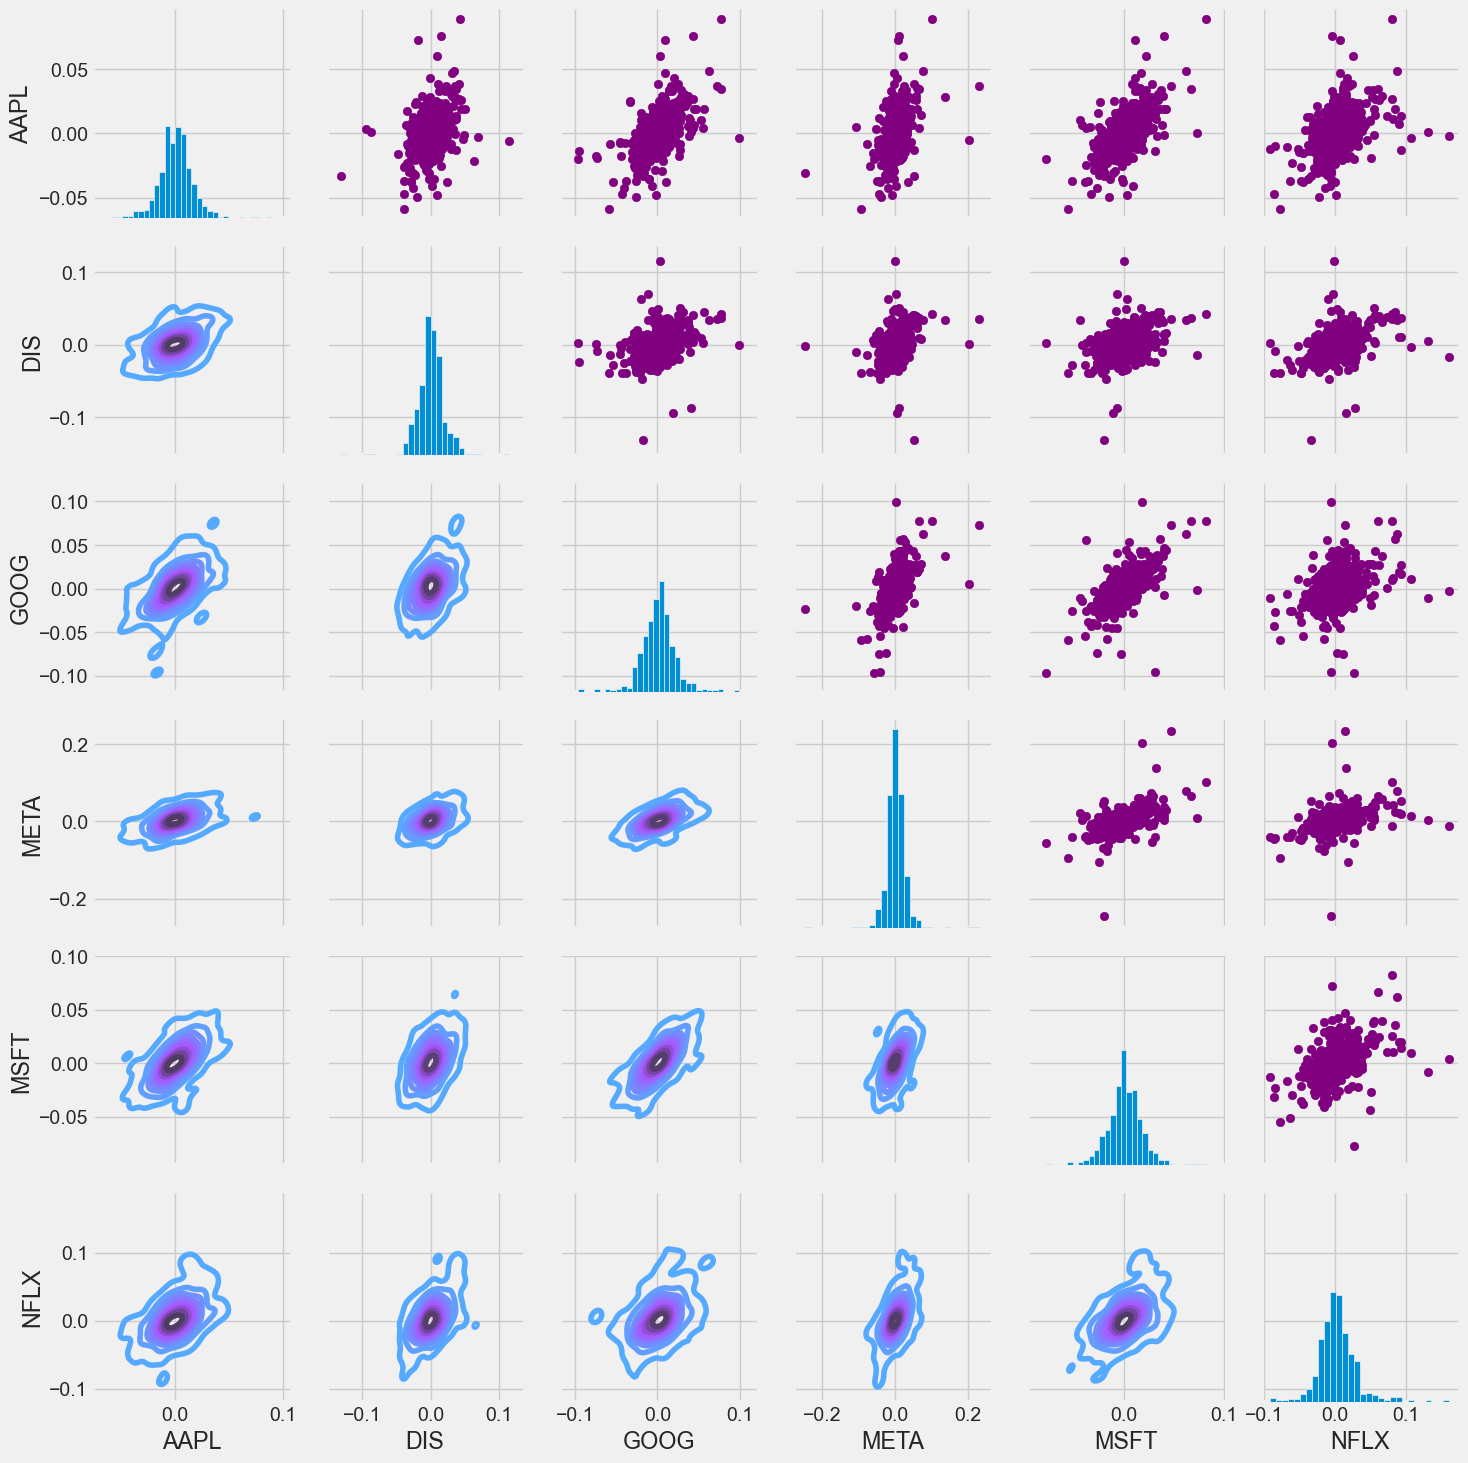

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

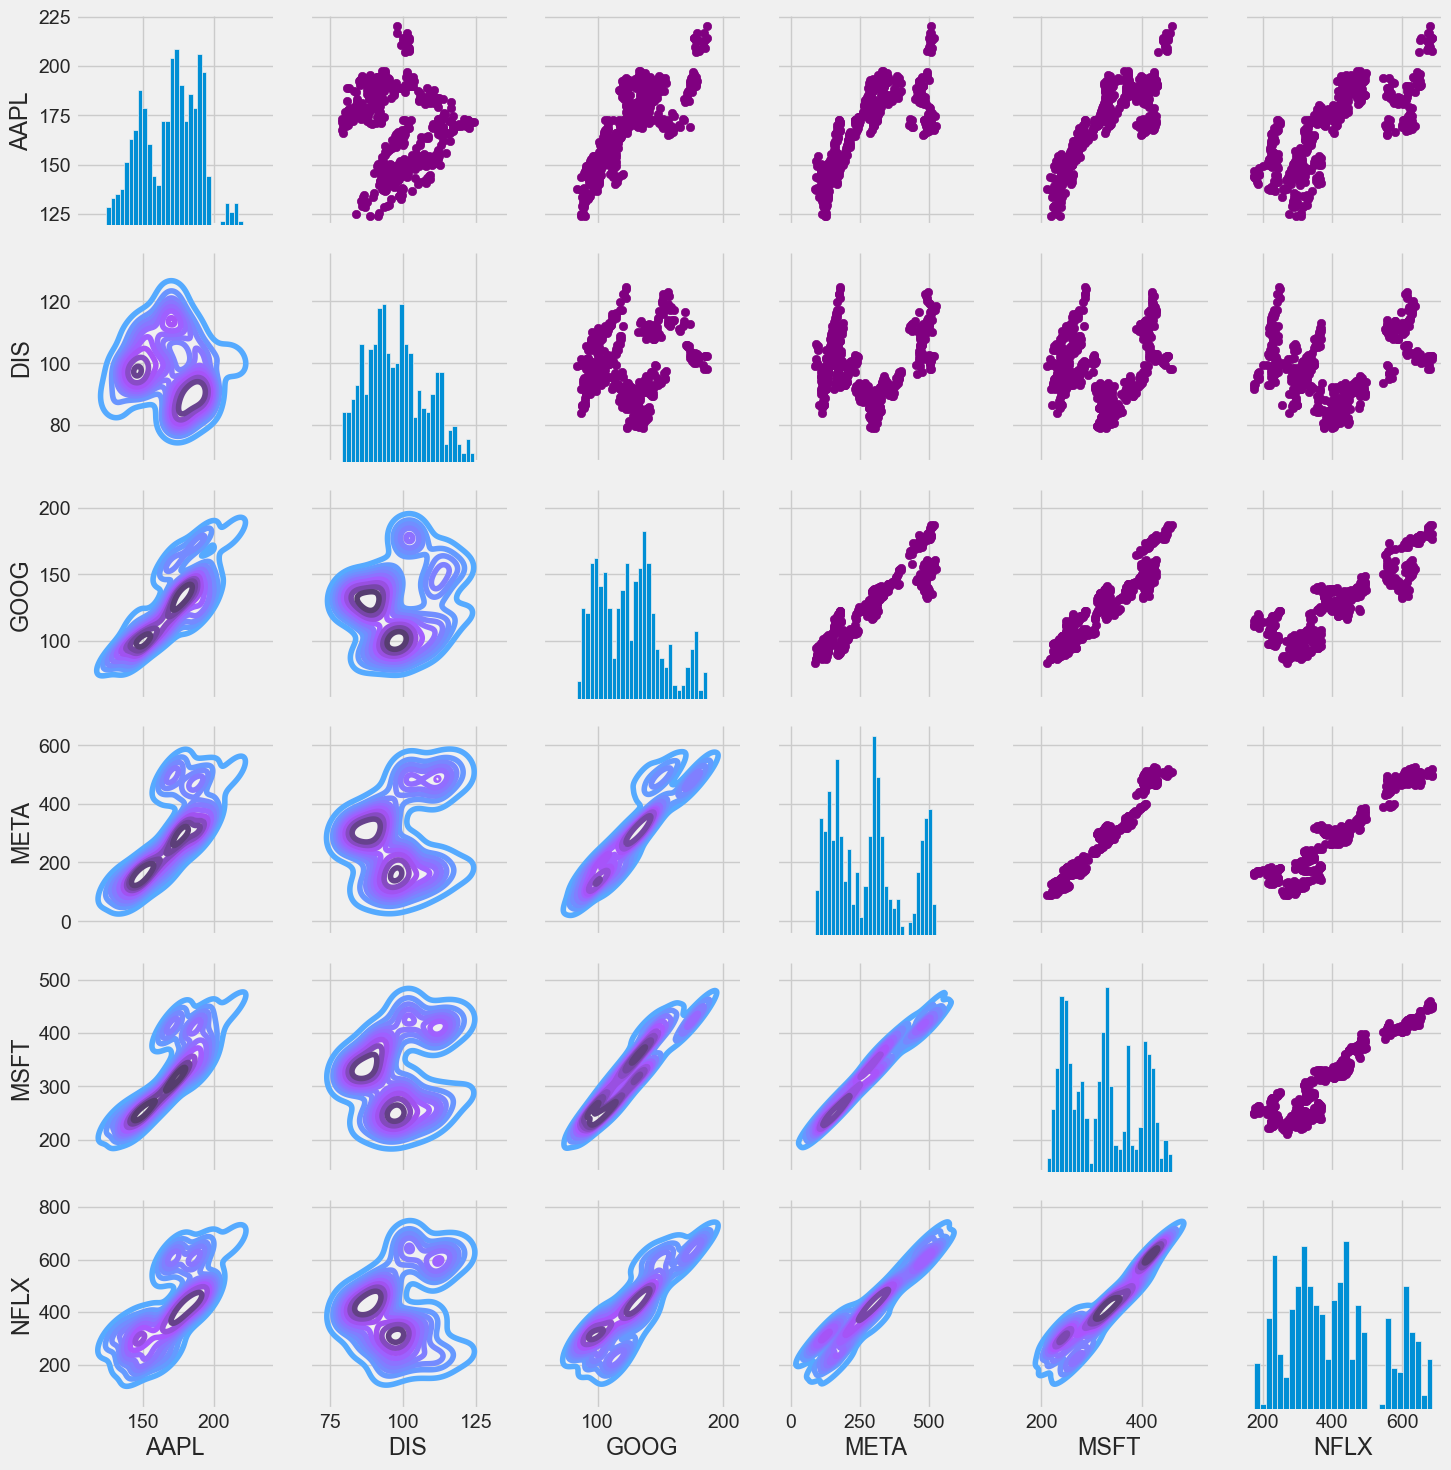

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Meta.

Text(0.5, 1.0, 'Correlation of stock closing price')

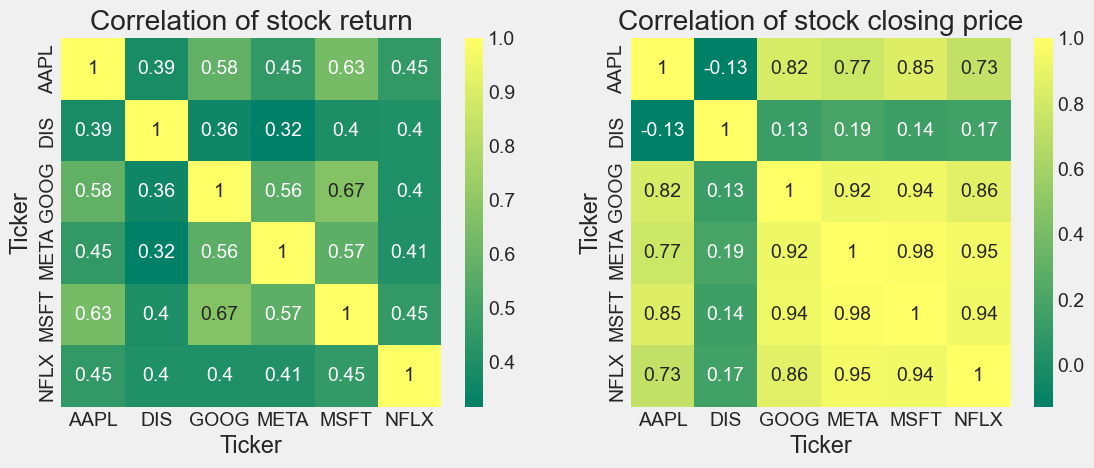

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Meta had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated. In contrast, Disney has very little correlations with them, even though it has a lot in common with Netflix, as a company.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

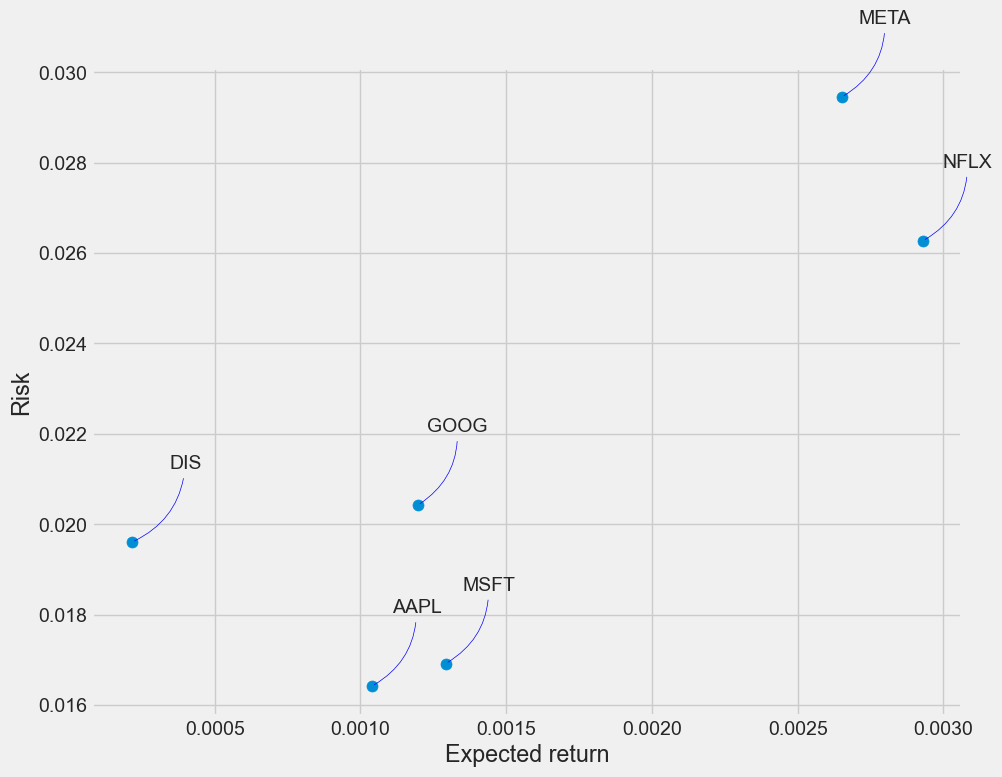

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of NFLX inc:

In [20]:
from datetime import datetime
# Get the stock quote
start='2020-01-01'
end=datetime.now()
df = pdr.get_data_yahoo('NFLX', start, end)
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  326.100006  329.980011  324.779999  329.809998  329.809998   
2020-01-03  326.779999  329.859985  325.529999  325.899994  325.899994   
2020-01-06  323.119995  336.359985  321.200012  335.829987  335.829987   
2020-01-07  336.470001  336.700012  330.299988  330.750000  330.750000   
2020-01-08  331.489990  342.700012  331.049988  339.260010  339.260010   
...                ...         ...         ...         ...         ...   
2024-06-26  672.409973  682.960022  670.020020  677.690002  677.690002   
2024-06-27  679.349976  688.570007  678.140015  684.340027  684.340027   
2024-06-28  679.000000  687.000000  673.080017  674.880005  674.880005   
2024-07-01  674.890015  675.020020  663.780029  673.609985  673.609985   
2024-07-02  673.539978  681.739990  670.070007  679.580017  679.580017   

             Volume  
Date                 
2020-01-02  4485800  
2020-01-03  3806900  
2020-01-06  5663100  
2020-01-07  4703200  
2020-01-08  7104500  
...             ...  
2024-06-26  3545800  
2024-06-27  2404800  
2024-06-28  3412400  
2024-07-01  2212800  
2024-07-02  2409700  

[1132 rows x 6 columns]

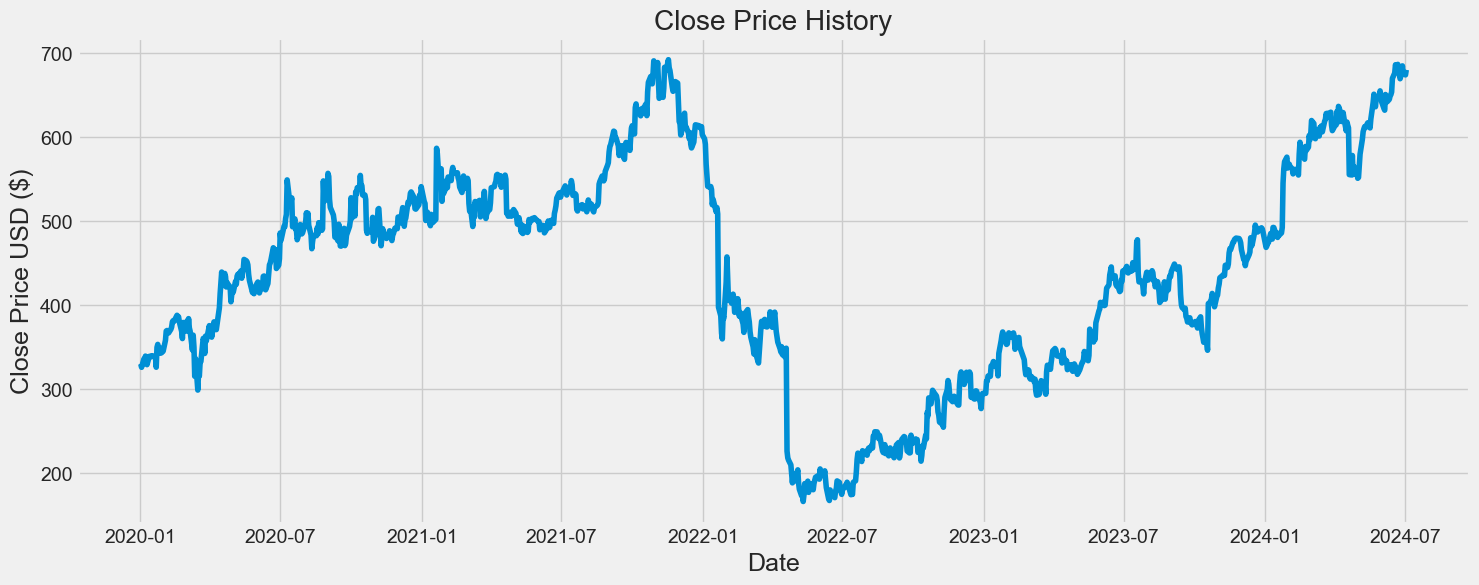

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Linear reg

[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 167.11395001128454


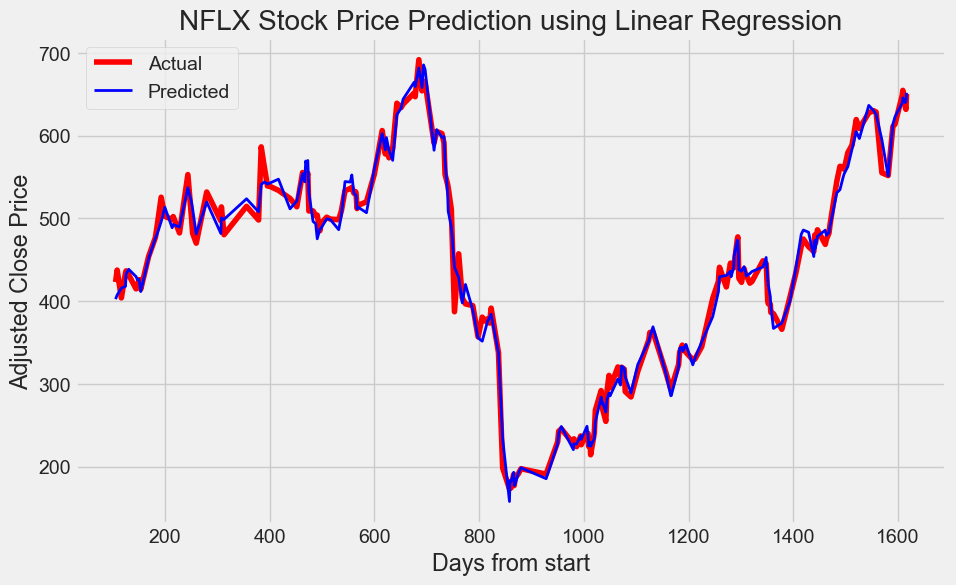

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import yfinance as yf

# Fetching the data
stock = 'NFLX'
start_date = '2020-01-01'
end_date = '2024-06-06'
df = yf.download(stock, start=start_date, end=end_date)

# Preprocessing the data
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = (df['Date'] - df['Date'].min()).dt.days

# Adding moving averages
df['SMA_10'] = df['Adj Close'].rolling(window=10).mean()
df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
df['SMA_30'] = df['Adj Close'].rolling(window=30).mean()
df['SMA_60'] = df['Adj Close'].rolling(window=60).mean()

# Dropping rows with NaN values that are a result of moving averages
df.dropna(inplace=True)

# Feature and target selection
X = df[['Day', 'SMA_10', 'SMA_20']]  # Using days and moving averages as features
y = df['Adj Close']  # Predicting the Adjusted Closing Price

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Function to calculate RSI
def RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Adding RSI as a feature
df['RSI'] = RSI(df['Adj Close'])

# Dropping initial rows with NaN values from RSI and moving averages
df.dropna(inplace=True)

# Using polynomial features
degree = 2
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = polynomial_features.fit_transform(df[['Day', 'SMA_10', 'SMA_20', 'RSI']])


# Adding indices to X before transforming to polynomial features for later use in plotting
df['index'] = df.index

# Include the 'index' column for operations and save it before transforming
X = df[['Day', 'SMA_10', 'SMA_20', 'RSI', 'index']]
y = df['Adj Close']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Save the indices of the test data for plotting
test_indices = X_test['index']

# Drop the 'index' column from X_train and X_test before transforming
X_train = X_train.drop(columns=['index'])
X_test = X_test.drop(columns=['index'])

# Using polynomial features
degree = 2
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Creating and training the model
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train_poly, y_train)

# Predicting the test set results
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

import matplotlib.pyplot as plt

# Sorting the test data and predictions by days
sorted_indices = df.loc[test_indices, 'Day'].argsort()
sorted_days = df.loc[test_indices, 'Day'].iloc[sorted_indices]
sorted_actual = y_test.iloc[sorted_indices]
sorted_pred = y_pred[sorted_indices]

# Plotting the results using the saved test indices
plt.figure(figsize=(10, 6))
plt.plot(sorted_days, sorted_actual, color='red', label='Actual')
plt.plot(sorted_days, sorted_pred, color='blue', label='Predicted', linewidth=2)  # Changed to plot for a line
plt.title('NFLX Stock Price Prediction using Linear Regression')
plt.xlabel('Days from start')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


## Lasso Regression

[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 117.30683740275502


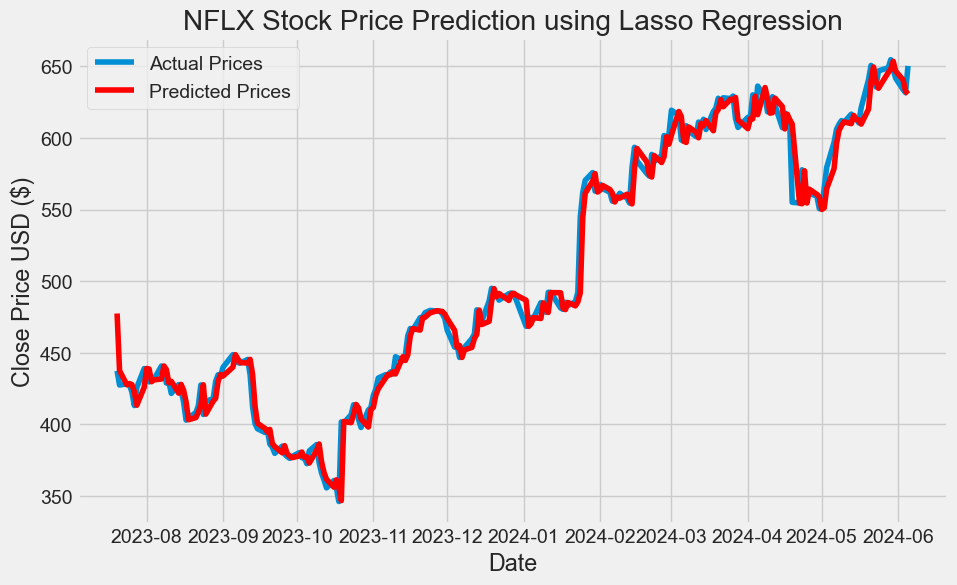

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import yfinance as yf
from datetime import datetime

# Fetching the data
stock = 'NFLX'
start_date = '2020-01-01'
end_date = '2024-06-06'
df = yf.download(stock, start=start_date, end=end_date)

# Ensure that df has a proper DateTimeIndex
df.index = pd.to_datetime(df.index)

# Feature Engineering: Using lagged closing prices as features
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(3)
df['Close_lag3'] = df['Close'].shift(7)

# Dropping rows with NaN values (due to lagged features)
df = df.dropna()

# Defining features and target
# X = df[['Close_lag1', 'Close_lag2', 'Close_lag3']]
X = df[['Close_lag1']]
y = df['Close']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# # Linear Regression Model
# linear_model = LinearRegression()  # Use LinearRegression instead of Lasso
# linear_model.fit(X_train, y_train)

# Predicting and calculating MSE
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('NFLX Stock Price Prediction using Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


Close        1.000000
Adj Close    1.000000
High         0.999002
Low          0.998970
Open         0.997698
Volume      -0.391580
Name: Close, dtype: float64
Optimal alpha: 0.1250946114226827
Mean Squared Error: 110.00651866132384


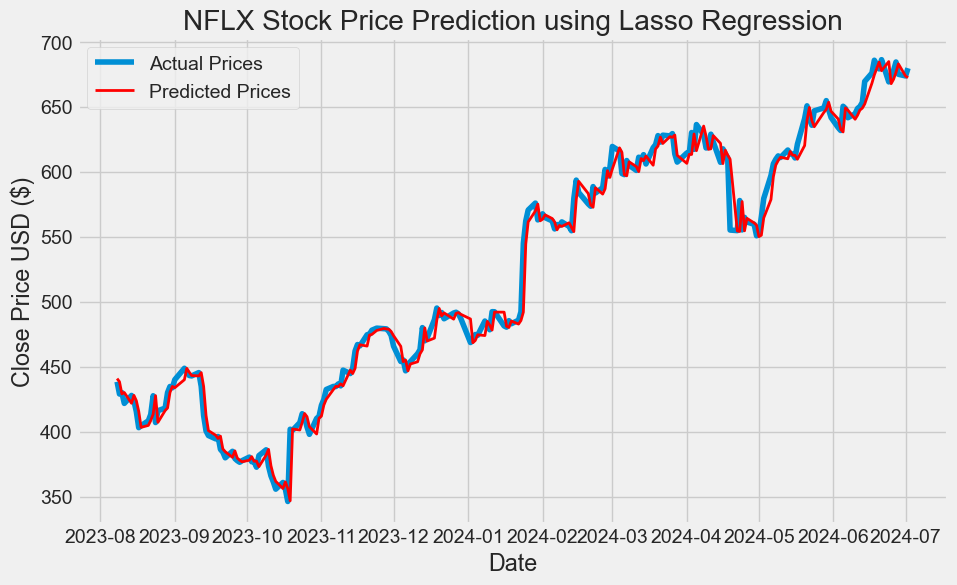

In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Fetching the data
stock = 'NFLX'
start_date = '2020-01-01'
end_date = datetime.now()
df = yf.download(stock, start=start_date, end=end_date)

# Calculating correlations
correlation_matrix = df.corr()
print(correlation_matrix['Close'].sort_values(ascending=False))

# Selecting features based on correlation
features = []  # Example of features to consider

# Prepare features with lagged values if the correlation suggests
df['Close_lag1'] = df['Close'].shift(1)
features.append('Close_lag1')

# Drop NaN values
df = df.dropna()

# Defining features and target
X = df[features]
y = df['Close']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data
train_size = int(len(X) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Lasso Regression with cross-validation to choose the best alpha
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Optimal alpha:", lasso_model.alpha_)
print("Mean Squared Error:", mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linewidth = 2)
plt.title('NFLX Stock Price Prediction using Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()


[*********************100%%**********************]  6 of 6 completed


Optimal alpha: 0.12509461142268272
Mean Squared Error: 110.00651866132384


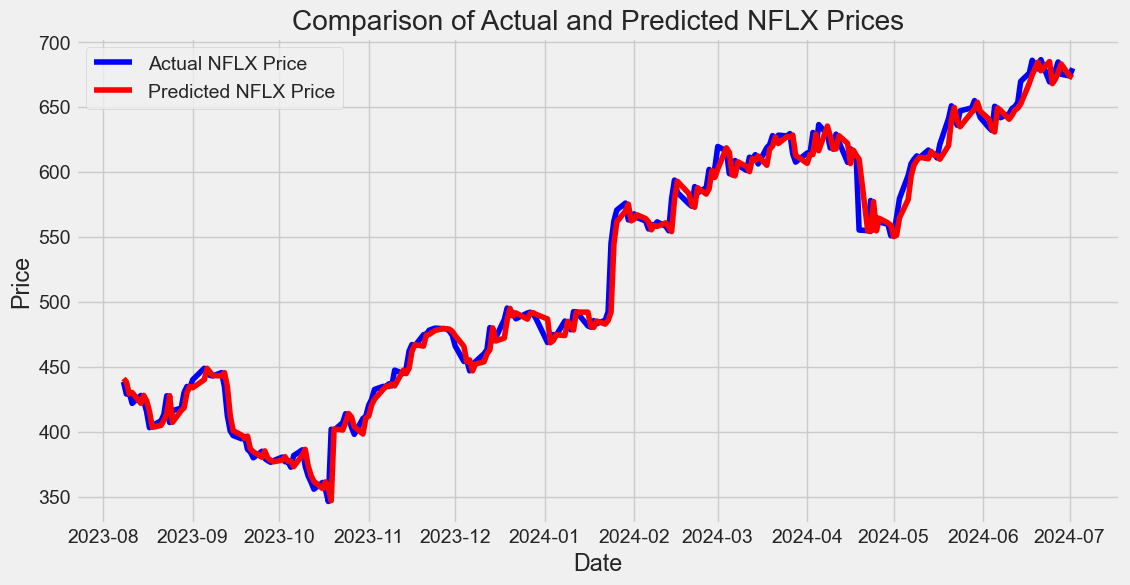

In [26]:
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Fetching the data for multiple stocks
stocks = ['NFLX', 'GOOG', 'AAPL', 'DIS', 'META', 'MSFT']
start_date = '2020-01-01'
end_date = datetime.now()
df_stocks = yf.download(stocks, start=start_date, end=end_date)['Close']

# Calculate lagged features for each stock
for stock in stocks:
    df_stocks[f'{stock}_lag1'] = df_stocks[stock].shift(1)

# Dropping rows with NaN values
df_stocks = df_stocks.dropna()

# Selecting features based on correlation
# Assume you're predicting NFLX, using lagged prices of GOOG and AAPL based on high correlation
features = ['NFLX_lag1', 'META_lag1']
X = df_stocks[features]
y = df_stocks['NFLX']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data
train_size = int(len(X) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Lasso Regression with cross-validation to choose the best alpha
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Optimal alpha:", lasso_model.alpha_)
print("Mean Squared Error:", mse)

# Dates corresponding to the test set for plotting
test_dates = df_stocks.index[train_size:]

# Plotting the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual NFLX Price', color='blue')
plt.plot(test_dates, y_pred, label='Predicted NFLX Price', color='red')
plt.title('Comparison of Actual and Predicted NFLX Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## LSTM MODEL

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

# Fetching the data
stock = 'NFLX'
start_date = start
end_date = end
df = yf.download(stock, start=start_date, end=end_date)

# Ensure that df has a proper DateTimeIndex
df.index = pd.to_datetime(df.index)

# Prepare data, assuming 'Close' column usage
data = df[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, sequence_length=60):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

sequence_length = 60
x, y = create_sequences(scaled_data, sequence_length)

# Define the training data length and split data
training_data_len = int(len(x) * 0.8)
x_train, y_train = x[:training_data_len], y[:training_data_len]
x_test, y_test = x[training_data_len:], y[training_data_len:]

# Adjusting indices for test data to get actual dates
test_dates = df.index[training_data_len+sequence_length:]

# Build and train LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(sequence_length, 1), activation='relu'),
    Dropout(0.2),
    LSTM(64, return_sequences=False, activation='relu'),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=4, epochs=10, validation_data=(x_test, y_test))  # Increased epochs, adjusted batch size
model.summary()

# Generate and prepare predictions
predictions = model.predict(x_test).flatten()

# Inverse scale predictions
predictions_inverse = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Preparing train and valid DataFrames
train = pd.DataFrame(data.iloc[sequence_length:training_data_len + sequence_length], index=df.index[sequence_length:training_data_len + sequence_length])
valid = pd.DataFrame(data.iloc[training_data_len + sequence_length:], index=test_dates)
valid['Predictions'] = predictions_inverse


[*********************100%%**********************]  1 of 1 completed
D:\Program Files\anaconda 3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0547 - val_loss: 0.0063
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0041 - val_loss: 0.0068
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0027 - val_loss: 0.0042
Epoch 9/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 10/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0025 - val_loss: 0.0032


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


The Mean Squared Error is 871.4468168604296


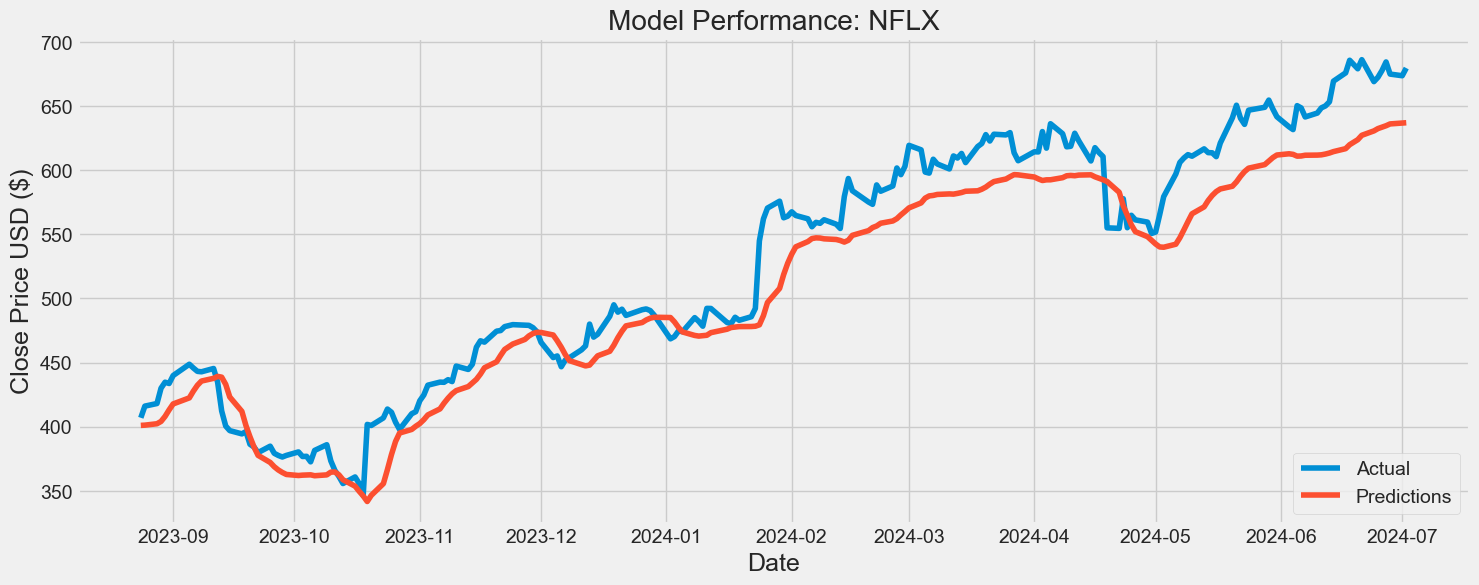

In [28]:
from sklearn.metrics import mean_squared_error

print('The Mean Squared Error is',mean_squared_error(valid['Close'].values,valid['Predictions'].values))
# Plotting the results
plt.figure(figsize=(16,6))
plt.title(f'Model Performance: {stock}')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

## LSTM WITH CORRELATIONS

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D


# Downloading the data
tech_list = ['NFLX', 'META', 'MSFT', 'GOOG', 'AAPL', 'DIS']
start_date = '2015-01-01'
end_date = datetime.now()
data = yf.download(tech_list, start=start_date, end=end_date)['Adj Close']

# Adding lagged features for selected stocks
for stock in tech_list:  # Example based on high correlation
    data[f'{stock}_lag1'] = data[stock].shift(1)
    data[f'{stock}_lag3'] = data[stock].shift(3)
    data[f'{stock}_lag7'] = data[stock].shift(7)
    
# Adding moving averages for each stock in the tech_list
for stock in tech_list:
    data[f'{stock}_SMA10'] = data[stock].rolling(window=10).mean()
    data[f'{stock}_SMA20'] = data[stock].rolling(window=20).mean()
    
# Dropping any NaN values that result from shifting or calculating moving averages
data = data.dropna()
    

# Dropping any NaN values that result from shifting
data = data.dropna()

# Prepare data with NFLX and the selected features
# Update the feature list to include moving averages
features = ['NFLX', 'NFLX_lag1', 'META_lag1', 'NFLX_SMA10']
X = data[features]
y = data['NFLX']

def calculate_RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

for stock in tech_list:
    data[f'{stock}_RSI'] = calculate_RSI(data[stock], window=14)
    
data = data.dropna()

features.extend([f'{stock}_RSI' for stock in tech_list])  # Adding RSI features to the feature list
X = data[features]

# Scaling the features
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(data['NFLX'].values.reshape(-1, 1))


# scaler = MinMaxScaler(feature_range=(0, 1))
# X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Function to create sequences
def create_sequences(X, y, sequence_length=60):
    x, y_out = [], []
    for i in range(len(X) - sequence_length - 1):
        x.append(X[i:(i + sequence_length)])
        y_out.append(y[i + sequence_length])
    return np.array(x), np.array(y_out)

# Preparing the datasets
sequence_length = 60
x, y = create_sequences(X_scaled, y_scaled.flatten(), sequence_length)

# Splitting the dataset
training_data_len = int(len(x) * 0.8)
x_train, y_train = x[:training_data_len], y[:training_data_len]
x_test, y_test = x[training_data_len:], y[training_data_len:]

# Model setup

def attention_3d_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)
    a = Dense(sequence_length, activation='softmax')(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

inputs = Input(shape=(sequence_length, len(features)))
attention_mul = attention_3d_block(inputs)
lstm_out = LSTM(128, return_sequences=False)(attention_mul)
output = Dense(1, activation='linear')(lstm_out)
model = Model(inputs=[inputs], outputs=output)

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=7, epochs=100, validation_data=(x_test, y_test))
model.summary()

# Generate and prepare predictions
predictions = model.predict(x_test).flatten()
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Prepare data for plotting
test_dates = data.index[training_data_len + sequence_length + 1: training_data_len + sequence_length + 1 + len(x_test)]

# Create a DataFrame for easier plotting
results = pd.DataFrame({
    'Actual': actual_prices,
    'Predicted': predicted_prices
}, index=test_dates)




[*********************100%%**********************]  6 of 6 completed

Epoch 1/100


263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0534 - val_loss: 0.0034
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.0946e-04 - val_loss: 8.3085e-04
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.9827e-04 - val_loss: 8.8940e-04
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.8750e-04 - val_loss: 4.8139e-04
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.8226e-04 - val_loss: 0.0011
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.5880e-04 - val_loss: 7.7673e-04
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.0310e-04 - val_loss: 3.6673e-04
Epoch 9/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.3183e-04 - val_loss: 4.4032e-04
Epoch 10/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.6094e-04 - val_loss: 4.8841e-04
Epoch 11/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.2478e-04 - v

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.5933e-04 - val_loss: 3.7795e-04
Epoch 65/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.7774e-04 - val_loss: 2.7506e-04
Epoch 66/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.6595e-04 - val_loss: 3.0129e-04
Epoch 67/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3264e-04 - val_loss: 2.8918e-04
Epoch 68/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.2796e-04 - val_loss: 2.6886e-04
Epoch 69/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.5253e-04 - val_loss: 2.7473e-04
Epoch 70/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.0681e-04 - val_loss: 2.8942e-04
Epoch 71/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.0230e-04 - val_loss: 3.3738e-04
Epoch 72/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3796e-04 - val_loss: 2.7086e-04
Epoch 73/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.6723e-04 - val_loss: 3.3174e-04
Epoch 74/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/st

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 60, 10)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ permute_5 (Permute)           │ (None, 10, 60)            │               0 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 10, 60)            │           3,660 │ permute_5[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_vec (Permute)       │ (None, 60, 10)            │               0 │ dense_13[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_5 (Multiply)         │ (None, 60, 10)            │               0 │ input_layer_7[0][0],       │
│                               │                           │                 │ attention_vec[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_9 (LSTM)                 │ (None, 128)               │          71,168 │ multiply_5[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_14 (Dense)              │ (None, 1)                 │             129 │ lstm_9[0][0]               │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 224,873 (878.41 KB)

 Trainable params: 74,957 (292.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 149,916 (585.61 KB)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


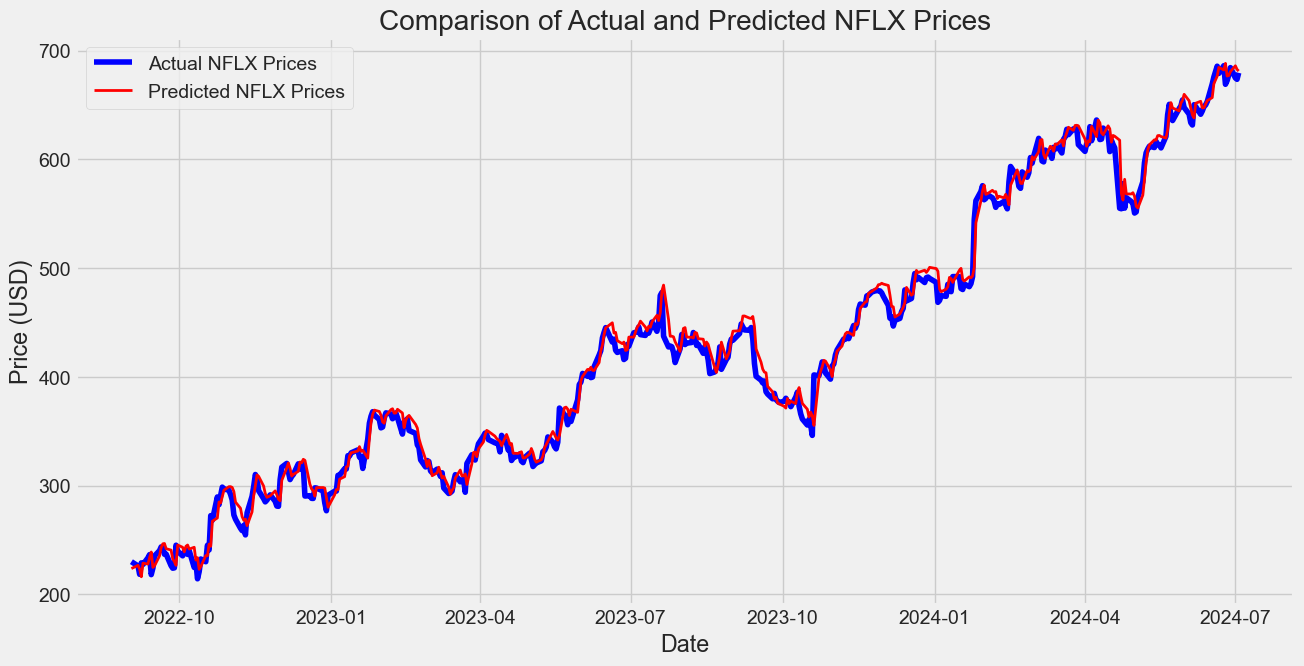

Mean Squared Error: 116.55955172206285


In [48]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(results['Actual'], label='Actual NFLX Prices', color='blue')
plt.plot(results['Predicted'], label='Predicted NFLX Prices', color='red', linewidth = 2)
plt.title('Comparison of Actual and Predicted NFLX Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the Mean Squared Error
mse = mean_squared_error(actual_prices, predicted_prices)
print("Mean Squared Error:", mse)